In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import math
from time import time
from math import sqrt
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
data=pd.read_csv(r"C:\Users\deeks\Desktop\CAPSTONE PROJECT\Kidnap.csv")

In [3]:
#Set X and y 

X=data.drop(["State/UT","Region_Type","KD_Total_Cases","Factors"],axis=1)
y=data["KD_Total_Cases"]

In [4]:
#Split the data set into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [5]:
#Define the models

models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [6]:
#Lists of metrics

train_t=[]
predict_t=[]
mse=[]
mae=[]
r2=[]

In [7]:
#Model Evaluation

for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    train_t.append(train_time)
    y_pred = model.predict(X_test)
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start   
    predict_t.append(predict_time) 
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    print("\tRoot Mean Squared Error: ",sqrt(mean_squared_error(y_test, y_pred)))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))
    print("")

LinearRegression()
	Training time: 0.016s
	Prediction time: 0.011s
	Mean squared error: 176235.07288707385
	Root Mean Squared Error:  419.8036122844512
	Mean absolute error: 181.65198863636363
	R2 score: 0.9900073987489251

KNeighborsRegressor()
	Training time: 0.008s
	Prediction time: 0.030s
	Mean squared error: 1357053.5427272727
	Root Mean Squared Error:  1164.9264108634814
	Mean absolute error: 409.89545454545447
	R2 score: 0.9230545049479373

DecisionTreeRegressor()
	Training time: 0.010s
	Prediction time: 0.008s
	Mean squared error: 1007719.4772727273
	Root Mean Squared Error:  1003.8523184576142
	Mean absolute error: 499.5681818181818
	R2 score: 0.9428618904037311

RandomForestRegressor()
	Training time: 0.512s
	Prediction time: 0.012s
	Mean squared error: 459035.16828636354
	Root Mean Squared Error:  677.5213415726205
	Mean absolute error: 324.89909090909083
	R2 score: 0.973972516810857

GradientBoostingRegressor()
	Training time: 0.337s
	Prediction time: 0.017s
	Mean squared e

In [8]:
#Feature Extraction

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150)

In [9]:
#Table of features

table= pd.DataFrame({'Importance':np.round(rf.feature_importances_,decimals=3)},index=X_train.columns).sort_values(by='Importance',ascending=False).head(10)
table

,Importance
Female_Kidnapped_and_Abducted,0.734
Total_Recovered,0.093
Between_18-30,0.025
Total_Adult_Victims,0.024
Female_18-30,0.022
Female_Recovered,0.018
Female_Adult_Victims,0.018
Mid_Year_Projection,0.011
Female_16-18,0.010
Male_above_60,0.005


In [10]:
#Set X and y

X = data[['Female_Kidnapped_and_Abducted','Total_Recovered','Between_18-30','Total_Adult_Victims','Mid_Year_Projection','Female_Adult_Victims','Female_18-30','Female_Recovered','Female_16-18','Female_30-60']].values
y = data['KD_Total_Cases'].values

In [11]:
#Split the data set into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [12]:
#Linear Regression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
#Coefficient

print(regressor.coef_)

[ 0.79023648 -0.04172808  0.34924189 -0.09128318 -0.39181982 -0.0532719
 -0.12331416  0.19578192  0.7292252   0.48050724]


In [14]:
#Intercept

print(regressor.intercept_)

96.42386676376145


In [15]:
#Test predicted

predicted = regressor.predict(X_test)
print(predicted)

[ 1667.84624685  7006.25022544    96.11041091 18579.18146296
   264.85900533   920.92998549  1520.1480287  10703.01992363
   273.39023942  2451.99051834   138.21973723  7844.30282534
   149.4298159    633.99074822   140.1507522    105.27838497
  6349.44189822   110.04108496   409.51565759  1482.18519802
  2097.14191062  7918.22049624   108.29175179    95.25187501
  9249.09466799   188.88950426  2452.91958818   178.61648646
 21174.05072368   137.56463859  2929.26317668  1350.80976188
  8056.17781813   112.49227029  3305.64323705   128.13040001
   854.72727752  4865.95943976  2301.72946327    99.31916236
  6235.15771028   265.36365122   276.3029239   5174.6115088
  1086.0742812   2628.36388481   817.76741689   882.43474352
  1948.26591095   105.89762783   129.26263641  2769.75730617
   253.1250982   7916.46997948    92.65914354   886.22693902
   190.446981    5042.54403631   720.41235961   178.37362942
   606.99551114    93.5714276    139.17831976   563.98099542
   220.41843386]


In [16]:
#Display prediction

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [17]:
#First 20 predictions

data1.head(20)

,Actual,Predicted
0,1996,1667.846247
1,6619,7006.250225
2,0,96.110411
3,19921,18579.181463
4,166,264.859005
5,1097,920.929985
6,1814,1520.148029
7,10502,10703.019924
8,297,273.390239
9,2071,2451.990518


In [23]:
#Pedicted metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))
print('R-squared:', metrics.r2_score(y_test,predicted))

Mean Absolute Error: 288.92443033401804
Mean Squared Error: 245610.51582740922
Root Mean Squared Error: 495.5910772273944
R-squared: 0.9858157685195651


<AxesSubplot:>

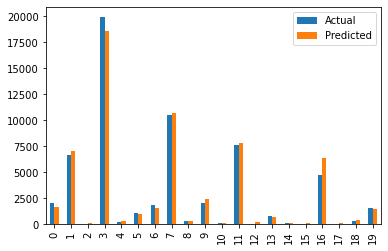

In [24]:
#Plotting prediction

graph = data1.head(20)
graph.plot(kind='bar')

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [26]:
#creating the desired dataset

df_UP = data[data['State/UT']=='Uttar Pradesh']
df_UP.drop(data.columns.difference(['Year','KD_Total_Cases']), 1, inplace=True)
X = df_UP.groupby(['Year'], sort=True).sum()
df_UP = pd.DataFrame(X)
df_UP=df_UP.reset_index()
df_UP

C:\Users\deeks\AppData\Local\Temp/ipykernel_25916/837996411.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_UP.drop(data.columns.difference(['Year','KD_Total_Cases']), 1, inplace=True)
C:\Users\deeks\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,KD_Total_Cases
0,2016,15898
1,2017,19921
2,2018,21711
3,2019,166
4,2020,12913
5,2021,14554


<AxesSubplot:xlabel='Year'>

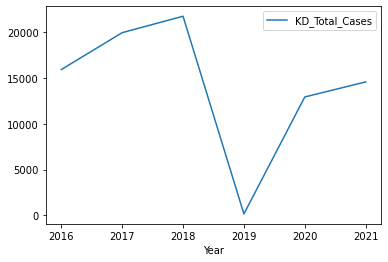

In [27]:
#plotting the graph 
df_UP.plot(kind = 'line',
        x = 'Year',
        y = 'KD_Total_Cases')

In [28]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
check_stationarity(df_UP['KD_Total_Cases'])

ADF Statistic: -1.968096
p-value: 0.300735
Critical Values:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Non-stationary


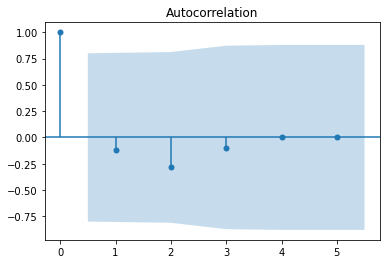

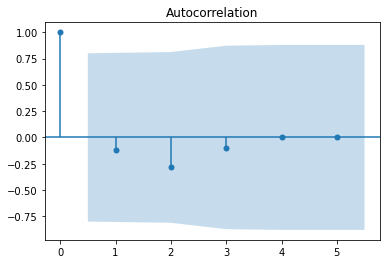

In [29]:
#acf plot
plot_acf(df_UP['KD_Total_Cases'],lags=5)

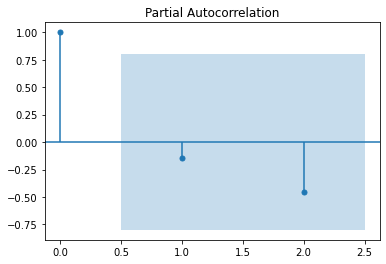

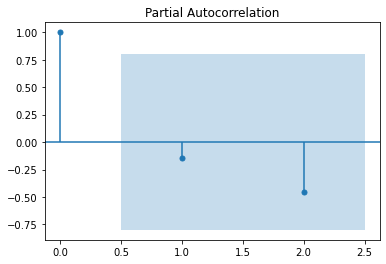

In [30]:
#pacf plot
plot_pacf(df_UP['KD_Total_Cases'],lags=2)

In [31]:
#building the ARIMA model with p=1,d=1,q=1
model = ARIMA(df_UP['KD_Total_Cases'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         KD_Total_Cases   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -40088.580
Date:                Mon, 03 Apr 2023   AIC                          80183.160
Time:                        19:16:52   BIC                          80181.988
Sample:                             0   HQIC                         80180.015
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1163      0.001   -184.133      0.000      -0.118      -0.115
ma.L1         -0.9977      0.174     -5.747      0.000      -1.338      -0.657
sigma2      3581.0592    619.822      5.778      0.0

C:\Users\deeks\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
fc = model_fit.forecast(5, alpha=0.05)
for i in fc:
    print(round(i,0))

14102.0
14154.0
14148.0
14149.0
14149.0
